In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/job_en_with_skills.csv') 
skill_df = pd.read_csv('../data/skill.csv')

In [4]:
df.head()

,company_name,city_text,exp,item_tag,company_scale,company_field,position,education,min_salary,max_salary,average_salary,platform,job_des,job_require,skills,group_skill
0,Navigos Search's Client,Hà Nội,3.0,Product Owner,NaN,Information technology,Staff,bachelor,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc Navigos Search's Client is loo...,Yêu cầu công việc - A Bachelor’s degree in a r...,"agile, blockchain, data, go, performance, qa, ...","Data Systems, Languages, OS & Infrastructure, ..."
1,Navigos Search's Client,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs) Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
2,Navigos Search's Client,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs)_Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
3,Navigos Search's Client,Hà Nội,3.5,Editorial - Retouch Specialist,NaN,Information technology,Staff,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việcTOP 4 JOB RESPONSIBILITIES Qual...,Yêu cầu công việcRequirements & Experience • 3...,NaN,NaN
4,"RGF HR Agent Vietnam Co., LTD",Hồ Chí Minh,8.0,116935 - Principal Backend Engineer - IT softw...,NaN,Information technology,Staff,NaN,97000000.0,100000000.0,98500000.0,careerviet,Mô tả Công việc - Work Location: Phu N...,YÊU CẦU CÔNG VIỆC <Necessary Skill / Experienc...,"agile, architecture, design, docker, express, ...","Languages, Libs & Frameworks, OS & Infrastruct..."


# VISUALIZATION

## SKILLS

In [5]:
skills = df['skills'].str.split(',', expand=True).stack().str.strip()
top_20_skills = skills.value_counts().head(20)
print("Top 20 skills by frequency:")
print(top_20_skills)


Top 20 skills by frequency:
design            1530
data               768
performance        593
testing            479
web                393
security           383
database           353
agile              339
sql                336
api                303
cloud              282
automation         270
java               267
architecture       261
ui                 251
python             240
infrastructure     232
ux                 228
aws                191
git                185
Name: count, dtype: int64


Text(0, 0.5, 'Skills')

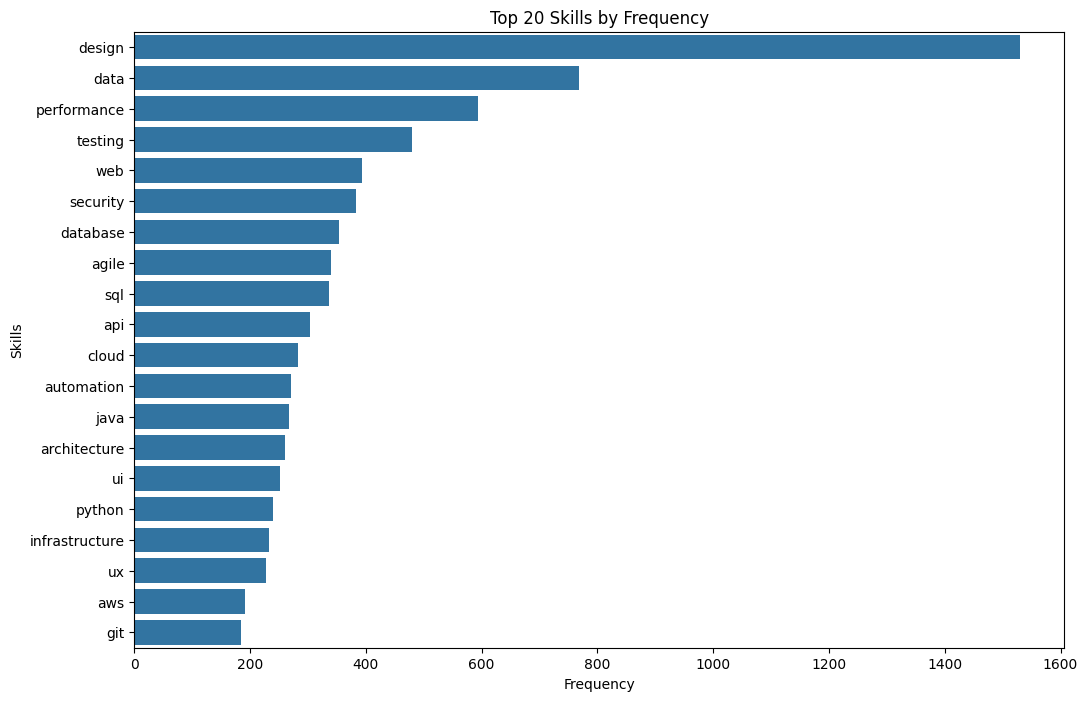

In [6]:
# chart top 20 skills
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_skills.values, y=top_20_skills.index)
plt.title('Top 20 Skills by Frequency') 
plt.xlabel('Frequency')
plt.ylabel('Skills')

In [7]:
# Split skills and count their occurrences
skills_exploded = df['skills'].dropna().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
skill_counts = skills_exploded.value_counts()
print("Top Most Frequent Skills:")
print(skill_counts.head(10))

# Load skill.csv and map each skill to a corresponding skill group (group_skill)
skill_mapping = dict(zip(skill_df['skill'].str.strip().str.lower(), skill_df['group_skill'].str.strip()))

# Convert skills to lowercase to improve mapping accuracy
skills_exploded_lower = skills_exploded.str.lower()
mapped_group_skills = skills_exploded_lower.map(skill_mapping)

# Count the number of occurrences for each skill group
group_skill_counts = mapped_group_skills.value_counts(dropna=True)
print("\nFrequency of Skill Groups:")
print(group_skill_counts)

# For each skill group, list the top 5 most frequent individual skills
print("\nTop 5 Most Common Skills per Skill Group:")

# Merge individual skills and their mapped group skills into a single DataFrame
mapped_df = pd.DataFrame({'skill': skills_exploded_lower, 'group_skill': mapped_group_skills})

# Remove skills that could not be mapped to any group
mapped_df = mapped_df.dropna()

# Loop through each group_skill and print the top 5 associated skills
for group, group_data in mapped_df.groupby('group_skill'):
    top_skills = group_data['skill'].value_counts().head(5)
    print(f"\n▶️ Group: {group}")
    print(top_skills)


Top Most Frequent Skills:
design         1530
data            768
performance     593
testing         479
web             393
security        383
database        353
agile           339
sql             336
api             303
Name: count, dtype: int64

Frequency of Skill Groups:
Process & Methods      4538
OS & Infrastructure    3365
Languages              2361
Data Systems           2220
Libs & Frameworks      1424
Development Tools       913
Name: count, dtype: int64

Top 5 Most Common Skills per Skill Group:

▶️ Group: Data Systems
skill
data          768
database      353
mysql         181
oracle        129
postgresql    117
Name: count, dtype: int64

▶️ Group: Development Tools
skill
automation    270
git           185
jira          111
jenkins        54
gitlab         50
Name: count, dtype: int64

▶️ Group: Languages
skill
sql           336
java          267
python        240
javascript    179
c             169
Name: count, dtype: int64

▶️ Group: Libs & Frameworks
skill
api     

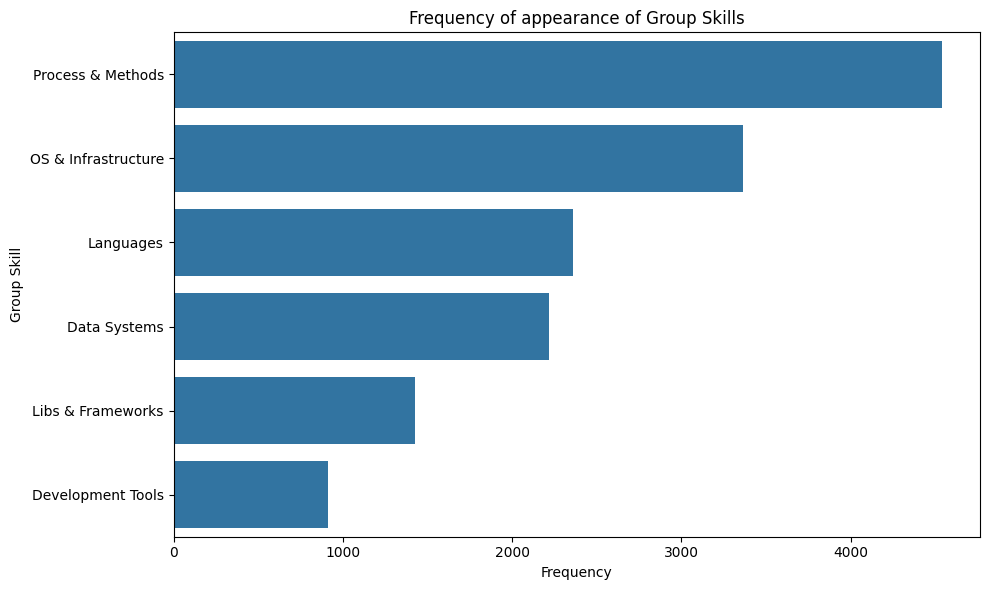

In [8]:
# group_skill
top_group_skills = group_skill_counts.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_group_skills.values, y=top_group_skills.index)
plt.title("Frequency of appearance of Group Skills")
plt.xlabel("Frequency")
plt.ylabel("Group Skill")
plt.tight_layout()
plt.show()


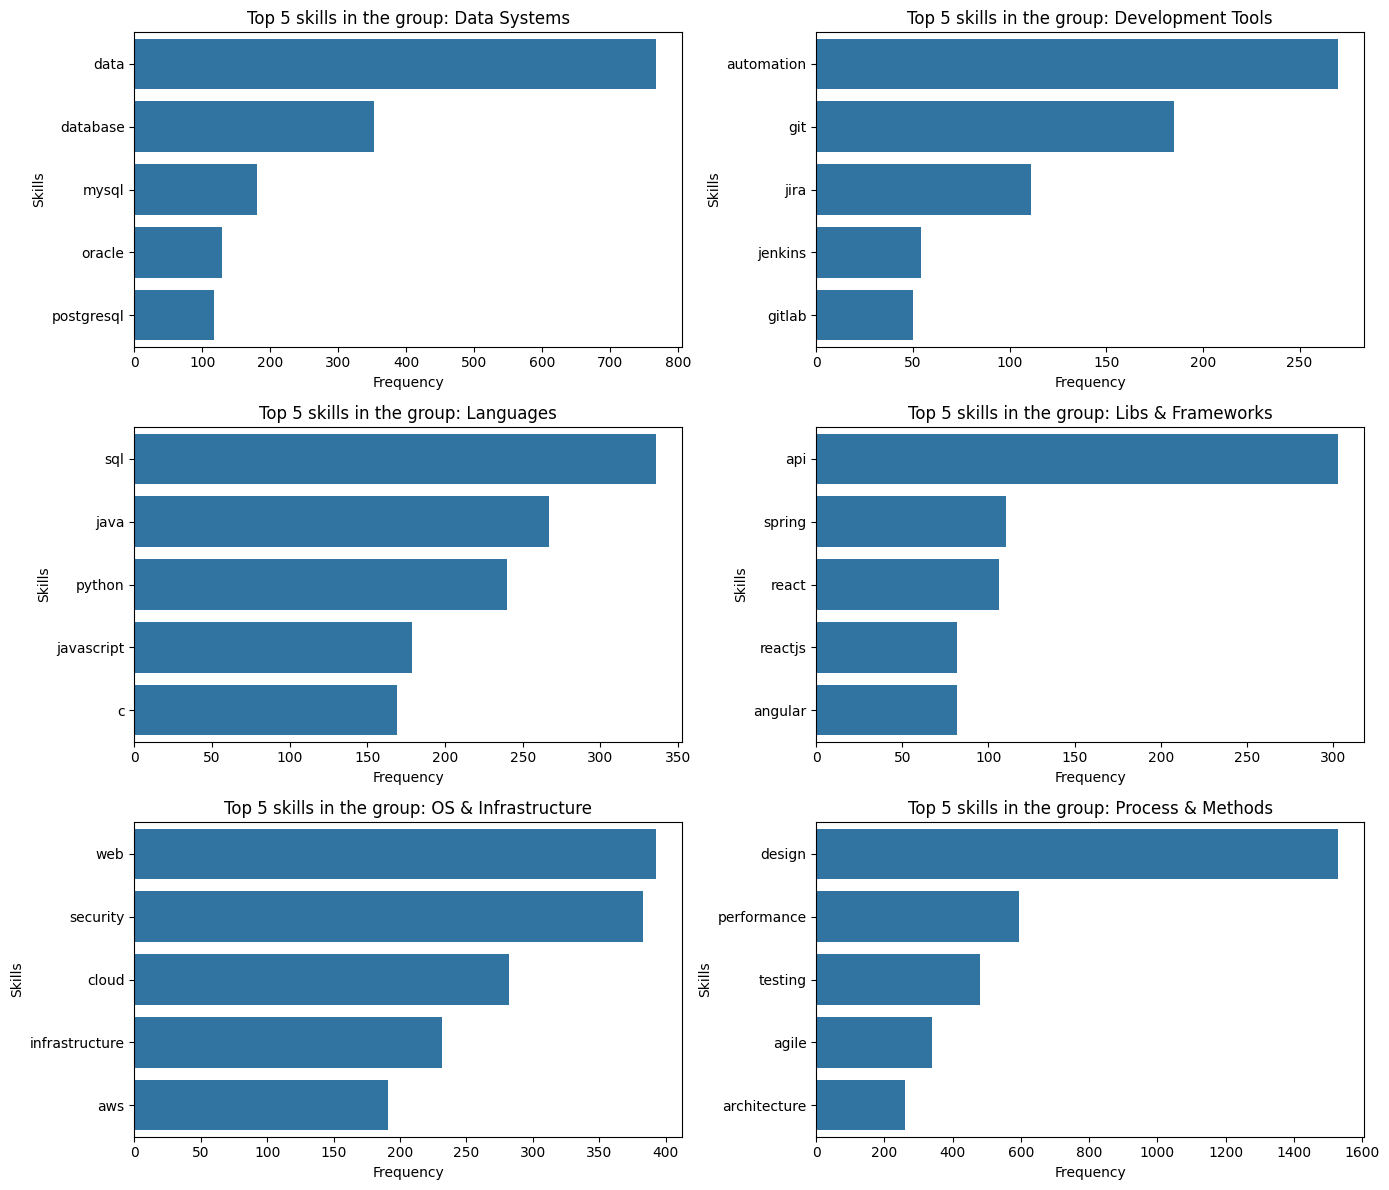

In [9]:

n_groups = mapped_df['group_skill'].nunique()
n_cols = 2
n_rows = math.ceil(n_groups / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Lặp qua group_skill để vẽ từng biểu đồ con
for i, (group, group_data) in enumerate(mapped_df.groupby('group_skill')):
    top_skills = group_data['skill'].value_counts().head(5)
    sns.barplot(x=top_skills.values, y=top_skills.index, ax=axes[i])
    axes[i].set_title(f'Top 5 skills in the group: {group}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Skills')

# Ẩn các ô trống nếu không đủ group
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## GEOGRAPHICAL DISTRIBUTION

In [11]:

df['city_text'] = df['city_text'].astype(str).apply(unidecode)

job_counts = df.groupby('city_text').size().reset_index(name='job_count')

## HISTOGRAM EXPERIENCE

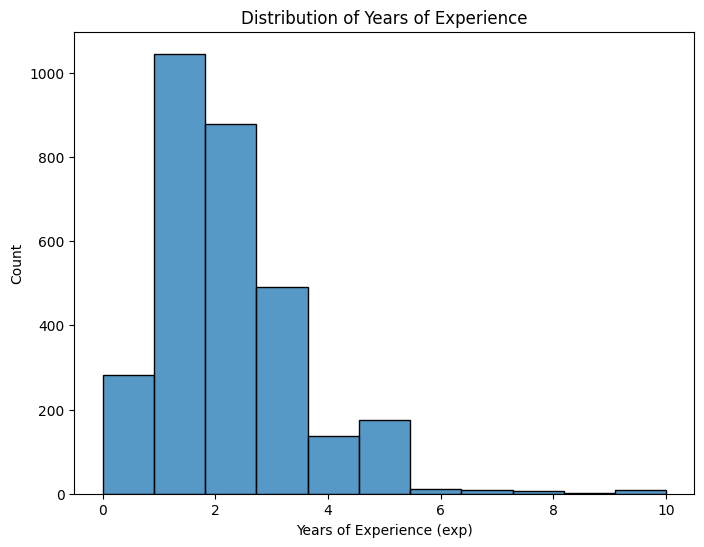

In [12]:
df = df[df['exp'] <= 10]

plt.figure(figsize=(8, 6))
sns.histplot(df['exp'], bins=11)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience (exp)')
plt.ylabel('Count')
plt.show()

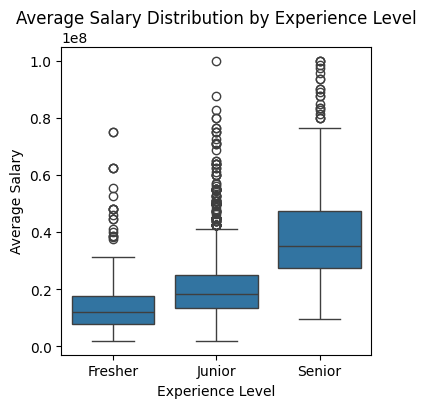

In [13]:
def categorize_experience(exp):
    if exp < 1:
        return 'Fresher'
    elif 1 <= exp <= 3:
        return 'Junior'
    else:
        return 'Senior'

df['exp_level'] = df['exp'].apply(categorize_experience)

plt.figure(figsize=(4, 4))
sns.boxplot(x='exp_level', y='average_salary', data=df, order=['Fresher', 'Junior', 'Senior'])
plt.title('Average Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.show()


## Job Count by Position Level Across Platforms

In [14]:
def categorize_experience(exp):
    if exp < 1:
        return 'Fresher'
    elif 1 <= exp <= 3:
        return 'Junior'
    else:
        return 'Senior'

df['exp_level'] = df['exp'].apply(categorize_experience)


In [15]:
count_df = df.groupby(['platform', 'exp_level']).size().reset_index(name='count')
total_per_platform = count_df.groupby('platform')['count'].transform('sum')
count_df['percentage'] = count_df['count'] / total_per_platform * 100


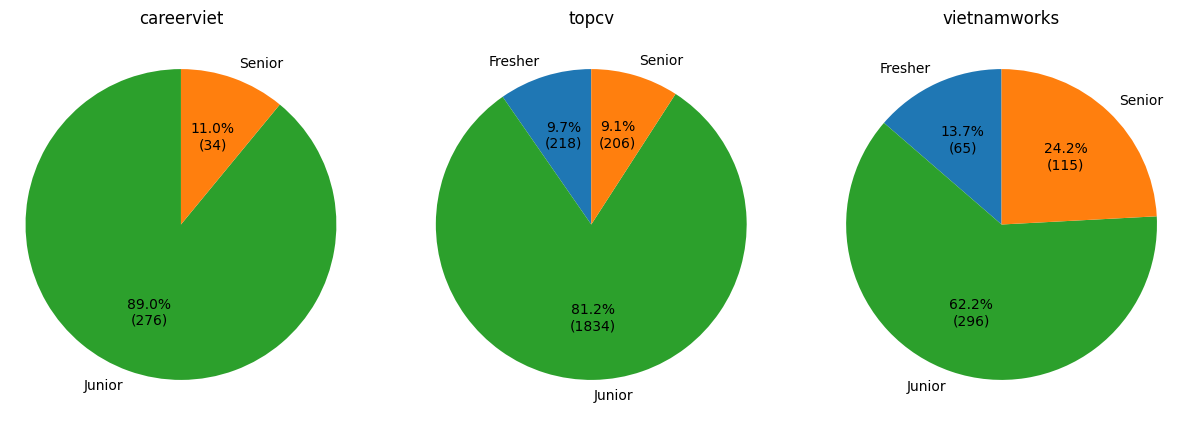

In [16]:
# Define platforms and color_map
platforms = count_df['platform'].unique()
color_map = {
    'Fresher': '#1f77b4',  
    'Junior': '#2ca02c',   
    'Senior': '#ff7f0e'    
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, platform in enumerate(platforms):
    platform_data = count_df[count_df['platform'] == platform]
    
    # Ensure the correct order and add any missing job levels (if applicable), then remove levels with a count of 0
    platform_data = (
        platform_data.set_index('exp_level')
        .reindex(['Fresher', 'Junior', 'Senior'])
        .fillna(0)
        .reset_index()
    )

    # Remove rows with a count of 0
    platform_data = platform_data[platform_data['count'] > 0]

    labels = platform_data['exp_level']
    sizes = platform_data['percentage']
    counts = platform_data['count']
    colors = [color_map[label] for label in labels]

    def make_autopct(counts):
        def autopct(pct):
            total = sum(counts)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'
        return autopct

    axes[i].pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct=make_autopct(counts),
        startangle=90
    )
    axes[i].set_title(f'{platform}')
    axes[i].axis('equal')


##  Boxplot of Salaries by Platform


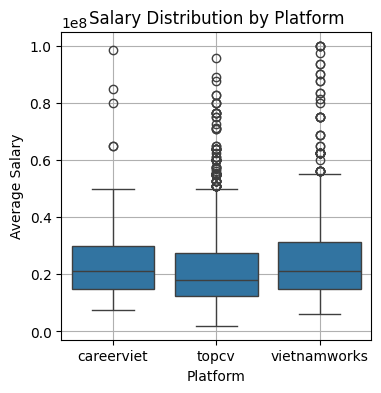

In [17]:
plt.figure(figsize=(4, 4))
sns.boxplot(
    x='platform',
    y='average_salary',
    data=df,
    order=['careerviet', 'topcv', 'vietnamworks']
)
plt.title('Salary Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()



## Boxplot of salaries by company field (Top 5 most common sectors)

C:\Users\vthuy\AppData\Local\Temp\ipykernel_33044\2549830490.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(wrapped_labels)


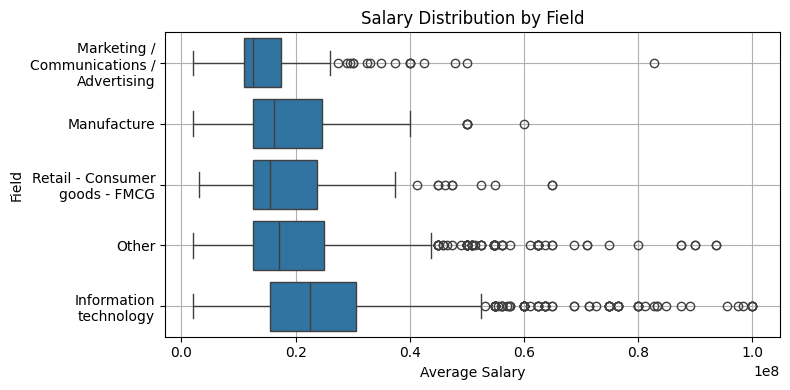

In [18]:

main_fields = [
    'Information technology',
    'Marketing / Communications / Advertising',
    'Retail - Consumer goods - FMCG',
    'Manufacture'
]


df['field_grouped'] = df['company_field'].apply(lambda x: x if x in main_fields else 'Other')

order = df.groupby('field_grouped')['average_salary'].mean().sort_values(ascending=True).index  # tăng dần cho biểu đồ ngang

import textwrap
wrapped_labels = [textwrap.fill(label, width=20) for label in order]

plt.figure(figsize=(8, 4))
ax = sns.boxplot(y='field_grouped', x='average_salary', data=df, order=order)
plt.title('Salary Distribution by Field')
plt.xlabel('Average Salary')
plt.ylabel('Field')

ax.set_yticklabels(wrapped_labels)

plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# SALARY DISTRIBUTION ANALYSIS WITH 10 BINS
import numpy as np

# Create salary bins (10 equal-width bins)
min_salary = df['average_salary'].min()
max_salary = df['average_salary'].max()
bin_width = (max_salary - min_salary) / 15
bins = [min_salary + i * bin_width for i in range(16)]

# Create bin labels
bin_labels = [f'{int(bins[i]/1e6):.0f}M-{int(bins[i+1]/1e6):.0f}M' for i in range(15)]
df['salary_bin'] = pd.cut(df['average_salary'], bins=bins, labels=bin_labels, include_lowest=True)

print("📊 SALARY DISTRIBUTION WITH 10 BINS")
print("=" * 50)
print(f"Salary range: {min_salary:,.0f} VND to {max_salary:,.0f} VND")
print(f"Bin width: {bin_width:,.0f} VND")
print("\nBin distribution:")
bin_counts = df['salary_bin'].value_counts().sort_index()
for bin_label, count in bin_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{bin_label}: {count:,} jobs ({percentage:.1f}%)")


📊 SALARY DISTRIBUTION WITH 10 BINS
Salary range: 2,000,000 VND to 100,000,000 VND
Bin width: 6,533,333 VND

Bin distribution:
2M-8M: 134 jobs (4.4%)
8M-15M: 976 jobs (32.1%)
15M-21M: 698 jobs (22.9%)
21M-28M: 469 jobs (15.4%)
28M-34M: 259 jobs (8.5%)
34M-41M: 234 jobs (7.7%)
41M-47M: 91 jobs (3.0%)
47M-54M: 67 jobs (2.2%)
54M-60M: 44 jobs (1.4%)
60M-67M: 26 jobs (0.9%)
67M-73M: 8 jobs (0.3%)
73M-80M: 17 jobs (0.6%)
80M-86M: 6 jobs (0.2%)
86M-93M: 6 jobs (0.2%)
93M-100M: 9 jobs (0.3%)


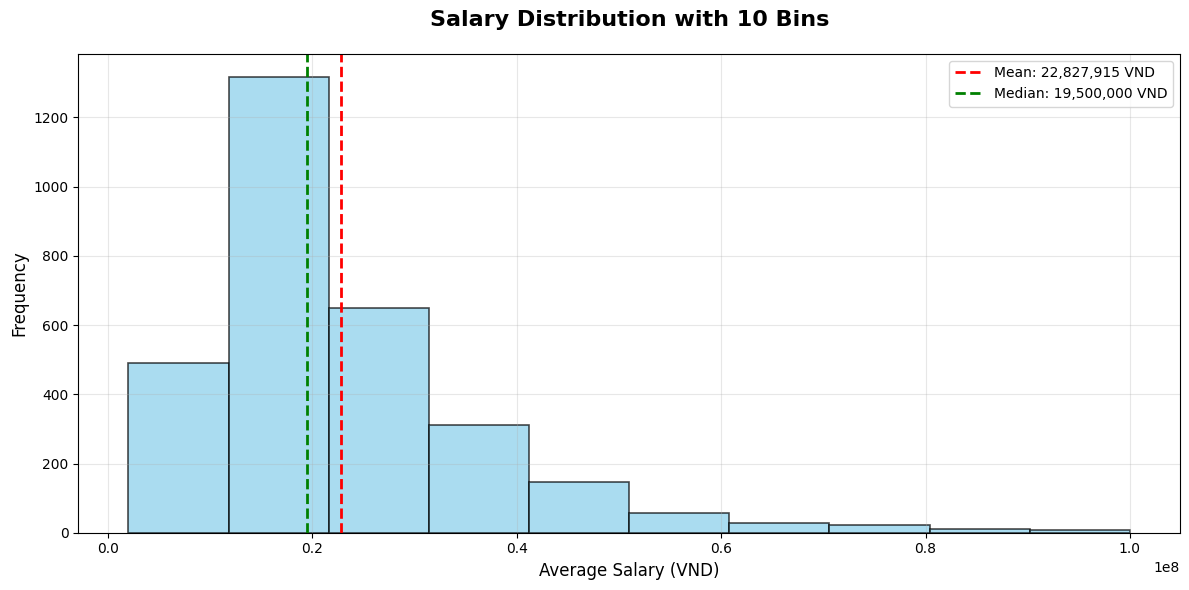

📈 Statistics:
Mean salary: 22,827,915 VND
Median salary: 19,500,000 VND
Standard deviation: 13,883,832 VND
Min salary: 2,000,000 VND
Max salary: 100,000,000 VND


In [20]:
# VISUALIZATION 1: Salary Distribution Histogram with 10 Bins
plt.figure(figsize=(12, 6))

# Create histogram with 10 bins
plt.hist(df['average_salary'], bins=10, alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)

# Add statistics lines
mean_salary = df['average_salary'].mean()
median_salary = df['average_salary'].median()
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_salary:,.0f} VND')
plt.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: {median_salary:,.0f} VND')

plt.title('Salary Distribution with 10 Bins', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Salary (VND)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📈 Statistics:")
print(f"Mean salary: {mean_salary:,.0f} VND")
print(f"Median salary: {median_salary:,.0f} VND")
print(f"Standard deviation: {df['average_salary'].std():,.0f} VND")
print(f"Min salary: {df['average_salary'].min():,.0f} VND")
print(f"Max salary: {df['average_salary'].max():,.0f} VND")


C:\Users\vthuy\AppData\Local\Temp\ipykernel_33044\3025640224.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(salary_data, labels=platforms, patch_artist=True)
C:\Users\vthuy\AppData\Local\Temp\ipykernel_33044\3025640224.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot2 = ax3.boxplot(exp_salary_data, labels=exp_groups, patch_artist=True)


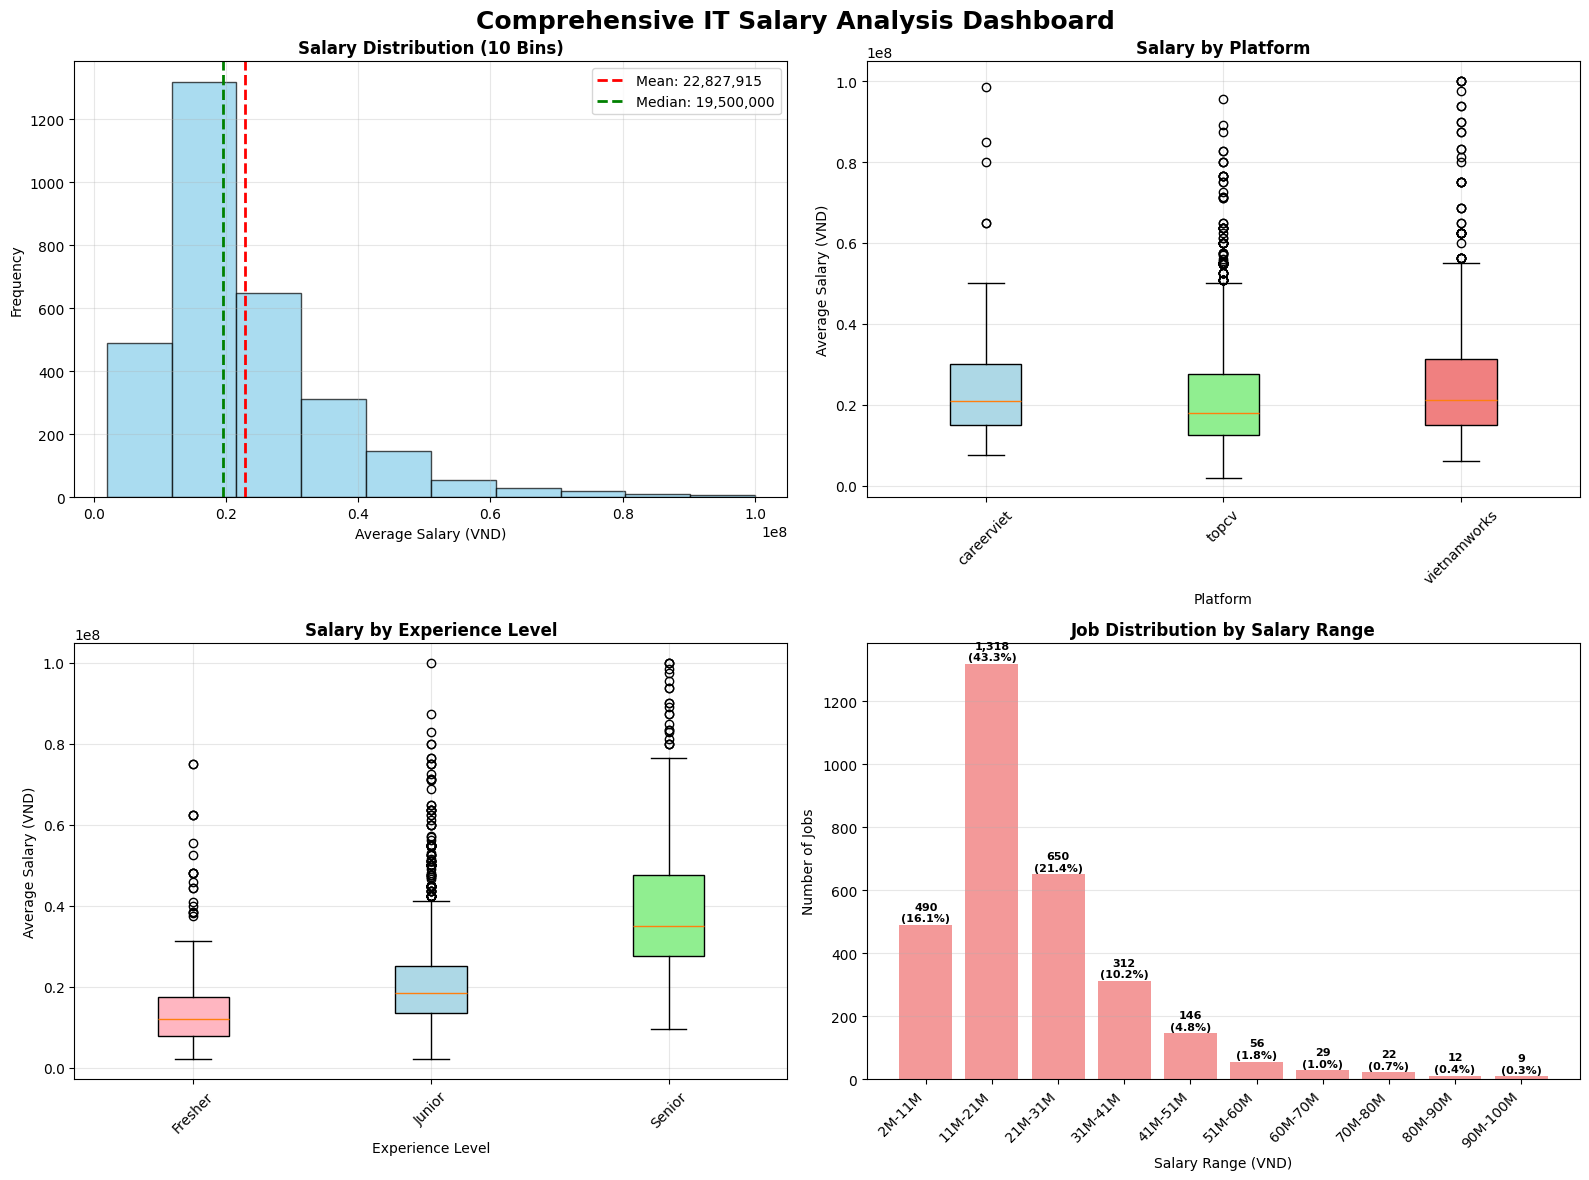

🎯 SALARY ANALYSIS SUMMARY
Total jobs analyzed: 3,044
Salary range: 2,000,000 VND to 100,000,000 VND
Mean salary: 22,827,915 VND
Median salary: 19,500,000 VND
Standard deviation: 13,883,832 VND

📊 Top 3 Salary Bins:
-------------------------
2M-11M: 490 jobs (16.1%)
11M-21M: 1,318 jobs (43.3%)
21M-31M: 650 jobs (21.4%)

✅ Salary distribution analysis completed!


In [21]:
# VISUALIZATION 5: Comprehensive Salary Analysis Dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Salary Distribution Histogram (10 bins)
ax1.hist(df['average_salary'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_salary:,.0f}')
ax1.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: {median_salary:,.0f}')
ax1.set_title('Salary Distribution (10 Bins)', fontweight='bold')
ax1.set_xlabel('Average Salary (VND)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Salary by Platform
platform_salary = df.groupby('platform')['average_salary'].apply(list)
platforms = list(platform_salary.index)
salary_data = [platform_salary[platform] for platform in platforms]

box_plot = ax2.boxplot(salary_data, labels=platforms, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors[:len(platforms)]):
    patch.set_facecolor(color)
ax2.set_title('Salary by Platform', fontweight='bold')
ax2.set_xlabel('Platform')
ax2.set_ylabel('Average Salary (VND)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Salary by Experience Level
exp_salary = df.groupby('exp_level')['average_salary'].apply(list)
exp_groups = list(exp_salary.index)
exp_salary_data = [exp_salary[group] for group in exp_groups]

box_plot2 = ax3.boxplot(exp_salary_data, labels=exp_groups, patch_artist=True)
colors2 = ['lightpink', 'lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box_plot2['boxes'], colors2[:len(exp_groups)]):
    patch.set_facecolor(color)
ax3.set_title('Salary by Experience Level', fontweight='bold')
ax3.set_xlabel('Experience Level')
ax3.set_ylabel('Average Salary (VND)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# 4. Salary Range Distribution (Bar Chart)
bin_counts = df['salary_bin'].value_counts().sort_index()
bars = ax4.bar(range(len(bin_counts)), bin_counts.values, color='lightcoral', alpha=0.8)
ax4.set_title('Job Distribution by Salary Range', fontweight='bold')
ax4.set_xlabel('Salary Range (VND)')
ax4.set_ylabel('Number of Jobs')
ax4.set_xticks(range(len(bin_counts)))
ax4.set_xticklabels(bin_counts.index, rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, bin_counts.values)):
    percentage = (value / len(df)) * 100
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.suptitle('Comprehensive IT Salary Analysis Dashboard', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("🎯 SALARY ANALYSIS SUMMARY")
print("=" * 50)
print(f"Total jobs analyzed: {len(df):,}")
print(f"Salary range: {df['average_salary'].min():,.0f} VND to {df['average_salary'].max():,.0f} VND")
print(f"Mean salary: {mean_salary:,.0f} VND")
print(f"Median salary: {median_salary:,.0f} VND")
print(f"Standard deviation: {df['average_salary'].std():,.0f} VND")

print("\n📊 Top 3 Salary Bins:")
print("-" * 25)
top_3_bins = bin_counts.head(3)
for bin_label, count in top_3_bins.items():
    percentage = (count / len(df)) * 100
    print(f"{bin_label}: {count:,} jobs ({percentage:.1f}%)")

print("\n✅ Salary distribution analysis completed!")
